# **Diabetes Prediction**

**Name: Tushar Sharma \
Registration Number: 12018293 \
Roll Number: RK20SSA16 \
Section: K20SS**

### About this project :-
- The objective of this project is to classify whether someone has diabetes or not.
- Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## *Import Required Libraries*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Do`cker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# !pip install missingno
import missingno as msno

#For ML
from datetime import date
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert/tensorflow2/en-wwm-cased-l-24-h-1024-a-16/4/saved_model.pb
/kaggle/input/bert/tensorflow2/en-wwm-cased-l-24-h-1024-a-16/4/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-wwm-cased-l-24-h-1024-a-16/4/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-wwm-cased-l-24-h-1024-a-16/4/variables/variables.index
/kaggle/input/bert/tensorflow2/en-wwm-cased-l-24-h-1024-a-16/4/variables/variables.data-00000-of-00001
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df_ = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df = df_.copy()


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## *Exploratory Data Analysis*

In [4]:
def check_df(dataframe, head=10):
    print('\033[1m' + 10*"*" + ' SHAPE ' + 10*"*" + '\033[0m')
    print(f"Rows:{dataframe.shape[0]}")
    print(f"Columns:{dataframe.shape[1]}")
    print('\033[1m' + 10*"*" + ' TYPES ' + 10*"*" + '\033[0m')
    print(dataframe.dtypes)
    print('\033[1m' + 10*"*" + ' NUNIQUE ELEMENTS ' + 10*"*" + '\033[0m')
    print(dataframe.nunique())
    print('\033[1m' + 10*"*" + ' NA ' + 10*"*" + '\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m' + 10*"*" + ' DESCRIBE ' + 10*"*" + '\033[0m')
    print(dataframe.describe().T)
    print('\033[1m' + 10*"*" + ' DUPLICATED VALUE ' + 10*"*" + '\033[0m')
    print(dataframe.duplicated().sum())
    print('\033[1m' + 10*"*" + ' HEAD ' + 10*"*" + '\033[0m')
    print(dataframe.head(head))
    
check_df(df,10)

********** SHAPE **********
Rows:768
Columns:9
********** TYPES **********
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
********** NUNIQUE ELEMENTS **********
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64
********** NA **********
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age         

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols
   """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [6]:
# Categorical variable list
cat_cols

['Outcome']

In [7]:
# Numerical variable list
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

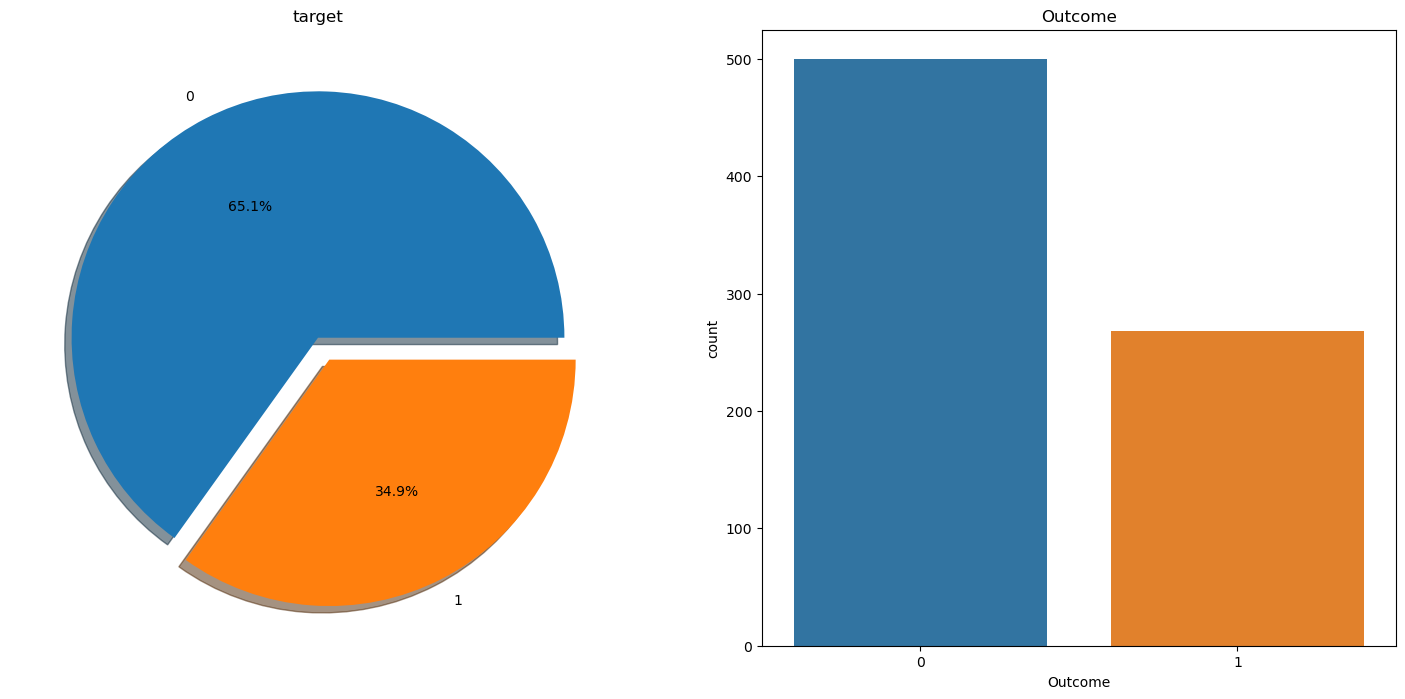

In [8]:
# Checking the target variable
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=df,x='Outcome',ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [9]:
# checking target variable 
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print("###################################")


for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672

###################################
            Glucose
Outcome            
0        109.980000
1        141.257463

###################################
         BloodPressure
Outcome               
0            68.184000
1            70.824627

###################################
         SkinThickness
Outcome               
0            19.664000
1            22.164179

###################################
            Insulin
Outcome            
0         68.792000
1        100.335821

###################################
               BMI
Outcome           
0        30.304200
1        35.142537

###################################
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500

###################################
               Age
Outcome           
0        31.190000
1        37.067164

########################

### *Missing Values*

In [10]:
#I define a function to give me a sort summary for missing values ratio
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


**At first, dataset has no missing values but when I examine closely I saw that that some values should not be 0 (Glucose, Insuli,Blood Pressure etc.). Therefore I will fill these feauture's values 0 to NaN.**

In [11]:
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_value].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


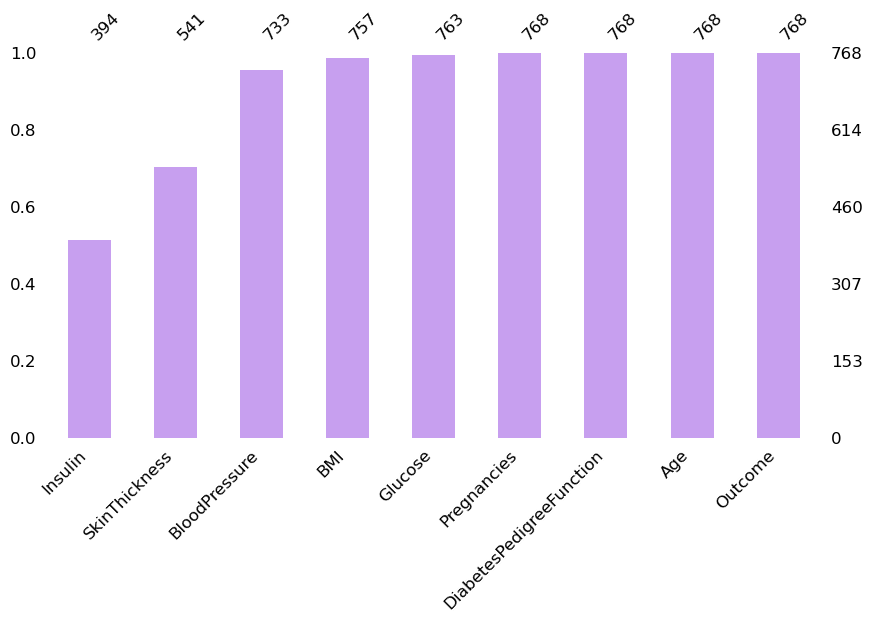

In [12]:
# Plotting the missing value
df[missing_value] = np.where(df[missing_value] == 0, np.nan, df[missing_value])
missing_values_table(df)
msno.bar(df, color="#C79FEF", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

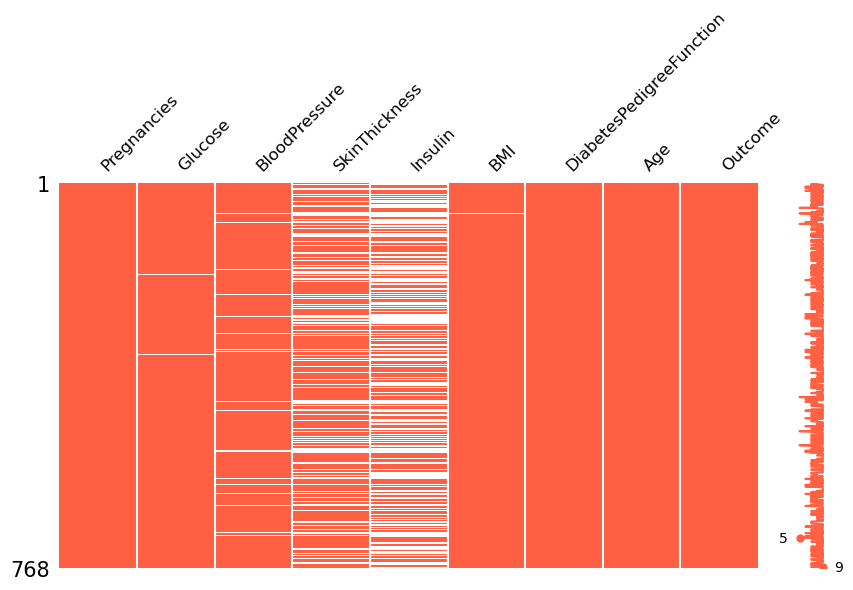

In [13]:
# using missingno matrix to visulize the missing value
msno.matrix(df,figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))
plt.show()

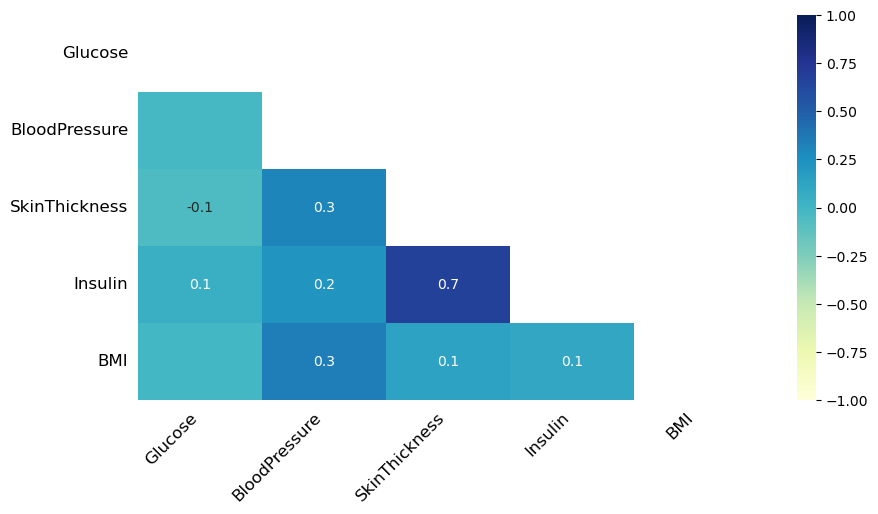

In [14]:
#I saw that insulin and BMI has the highest correlation in terms of an observation.
msno.heatmap(df,cmap ="YlGnBu",figsize=(10,5), fontsize=12)
plt.show()

In [15]:
#I wonder that how is the ratio between the missing values and target feauture. I write a fuction that can be used for this purpose.
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
na_cols = missing_values_table(df, True)


missing_vs_target(df, "Outcome", na_cols)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




 **BMI values documented that below source the level of 12, previously thought to mark the limit of human adaptation to starvation so with this information BMI lower than 12 will also be NaN.**

**Same issue applied for Blood Pressure also if the value is 90/60mmHg or less than that is considered the lowest blood pressure before death**

In [16]:
# I convert these feautres also to 0 that I mentioned above.
df.loc[df["BloodPressure"]<60, "BloodPressure"].count()  #121
df.loc[df["BloodPressure"]<60, "BloodPressure"] = 0

df[df["BMI"]<12]['BMI'].count() #11
df.loc[df["BMI"]<12,"BMI"] = 0

In [17]:
# If I have "Age" column, I can think categorization with that age column. Like grouping with 10 years apart.
df["age_bins"] = pd.cut(x=df["Age"],bins = [20,30,40,50,60,70,80,90])

df = df.fillna(df.groupby(['age_bins', 'Outcome', 'Pregnancies']).transform('median'))
missing_values_table(df)

               n_miss  ratio
Insulin            70   9.11
SkinThickness      38   4.95
BloodPressure       5   0.65
BMI                 2   0.26


In [18]:
#I checked with missing_values_table() function so I  stil have missing values so I narrowed down to fill these values.
df = df.fillna(df.groupby(['age_bins', 'Outcome']).transform('median'))
missing_values_table(df)

               n_miss  ratio
Insulin             8   1.04
BloodPressure       1   0.13
SkinThickness       1   0.13


In [19]:
#I filled all missing values.
df = df.fillna(df.groupby( 'Outcome').transform('median'))
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


### *Outlier Analysis*

In [20]:
# This function's job is to determine the threshols of outlier values.
# I chose the quantile values as 0.5 and 0.95.
def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# This function job's is if I have outlier it returns True
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False


In [21]:
# Making Boxplot to check outliers of variables in dataset
fig=make_subplots(rows=3,cols=2,subplot_titles=('<i>BloodPressure', '<i>SkinThickness', '<i>Insulin', '<i>DiabetesPedigreeFunction', '<i>BMI', '<i>Pregnancies'))
fig.add_trace(go.Box(x=df['BloodPressure'],name='BloodPressure'),row=1,col=1)
fig.add_trace(go.Box(x=df['SkinThickness'],name='SkinThickness'),row=1,col=2)
fig.add_trace(go.Box(x=df['Insulin'],name='Insulin'),row=2,col=1)
fig.add_trace(go.Box(x=df['DiabetesPedigreeFunction'],name='DiabetesPedigreeFunction'),row=2,col=2)
fig.add_trace(go.Box(x=df['BMI'],name='BMI'),row=3,col=1)
fig.add_trace(go.Box(x=df['Pregnancies'],name='Pregnancies'),row=3,col=2)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=False)

In [22]:
# This function's job is to change the outlier values to up and low limit value of outlier_thresholds() function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [23]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [24]:
# I checked the df with check_outlier(). Now,I saw I don't have outlier values.
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


<AxesSubplot:>

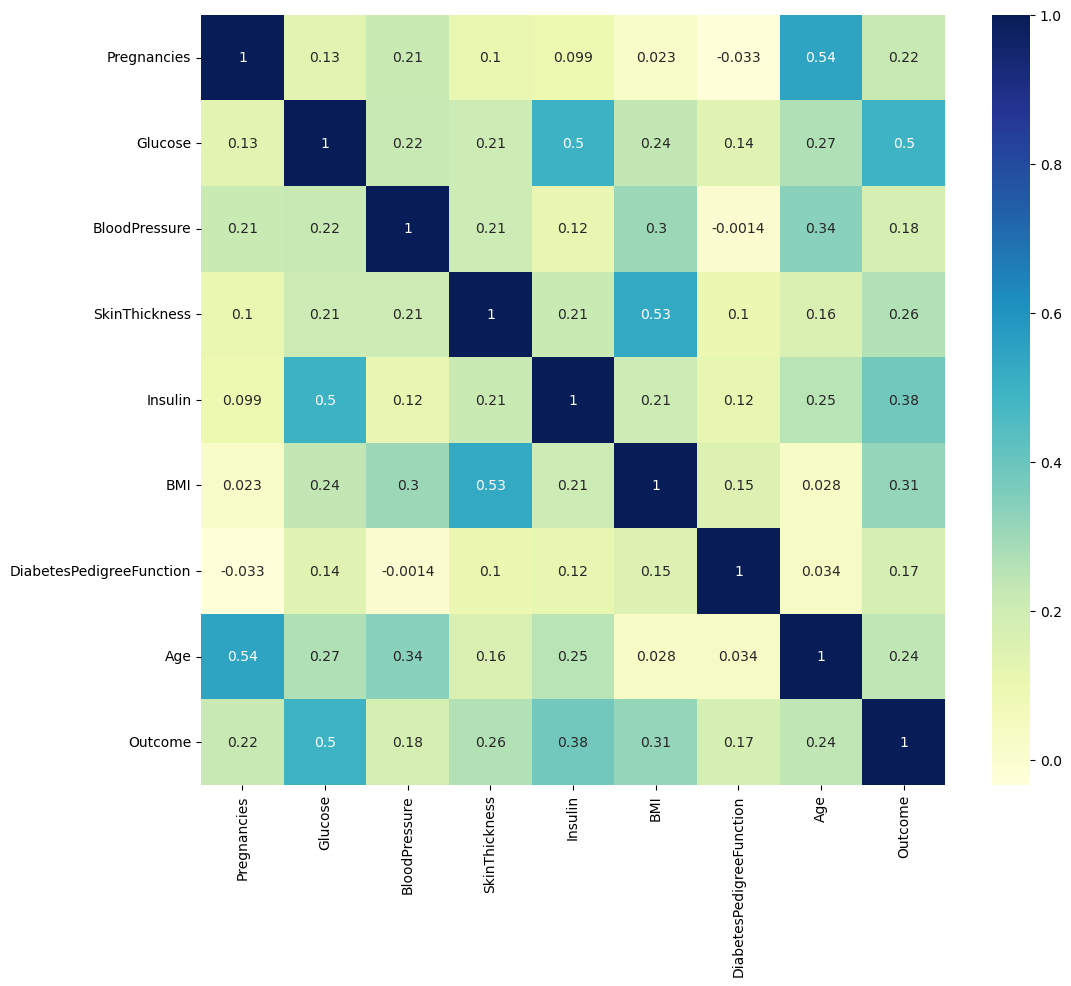

In [25]:
# Before the feature extraction I observed the correlation between all columns.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap ="YlGnBu")

### *Creating New Feature*

Firstly, in the missing values part I created age_bins. Then I will continue the add. I will create some of the features based on correlation

In [26]:
# Creatin with pregnancy
df.loc[(df['Pregnancies'] == 0), 'Preg_CAT']  = 'Never'
df.loc[(df['Pregnancies'] == 1), 'Preg_CAT']  = 'One Time'
df.loc[(df['Pregnancies'] > 1), 'Preg_CAT']   = 'Many Times'

In [27]:
#Creating with Insulin 
df.loc[(df['Insulin'] < 120)  , 'Insulin_CAT'] ="normal"
df.loc[(df['Insulin'] >= 120) , 'Insulin_CAT'] ="not-normal"

In [28]:
df.groupby("Insulin_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                 mean count
Insulin_CAT                
normal       0.098039   357
not-normal   0.566910   411

In [29]:
df["Age_BMI_CAT"] = df["Age"] * df["BMI"]

### *Feature Scaling*

To be remove the biasness of the feature, I will apply scaling. I will use RobustScaler() because this method is more robust to outliers.

In [30]:
num_cols
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

### *Encoding*

 I have to give to binary coding to model so this step sould be done. At first I have "Outcome" as categorial but I create other categorial features

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

In [32]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_CAT,Age_BMI_CAT,"age_bins_(30, 40]","age_bins_(40, 50]","age_bins_(50, 60]","age_bins_(60, 70]","age_bins_(70, 80]","age_bins_(80, 90]",Preg_CAT_Never,Preg_CAT_One Time
0,0.6,0.758410,0.0000,0.500000,1.602273,0.148352,0.665359,1.235294,1,1,1680.0,0,1,0,0,0,0,0,0
1,-0.4,-0.782875,-0.3750,0.000000,-0.556818,-0.620879,-0.056209,0.117647,0,0,824.6,1,0,0,0,0,0,0,1
2,1.0,1.614679,-0.5000,0.666667,0.545455,-0.983516,0.783007,0.176471,1,1,745.6,1,0,0,0,0,0,0,0
3,-0.4,-0.685015,-0.3750,-0.500000,-0.318182,-0.456044,-0.537255,-0.470588,0,0,590.1,0,0,0,0,0,0,0,1
4,-0.6,0.489297,-1.6875,0.500000,0.522727,1.192308,4.969608,0.235294,1,1,1422.3,1,0,0,0,0,0,1,0


### *Modelling*

In this part I will try 3 different models (RandomForestClassifier, Logistic Regression, KNN)

Logistic regression is a statistical method used to analyze the relationship between a categorical dependent variable and one or more independent variables. It estimates the probability of an event occurring by fitting data to a logistic function.

KNN (K-Nearest Neighbors) is a supervised machine learning algorithm used for classification and regression. It predicts the class of a new data point by comparing it to the k closest points in the training dataset.

RandomForestClassifier is a supervised machine learning model that uses an ensemble of decision trees to classify data.

In [33]:
# RandomForestClassifier
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        97
           1       0.86      0.65      0.74        57

    accuracy                           0.83       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



In [35]:
# Cross Validation
rf_model = RandomForestClassifier().fit(X_train, y_train)

cv_results = cross_validate(rf_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.8242424242424242
test_f1:  0.7446768005505784
test_roc_auc:  0.9035429769392034


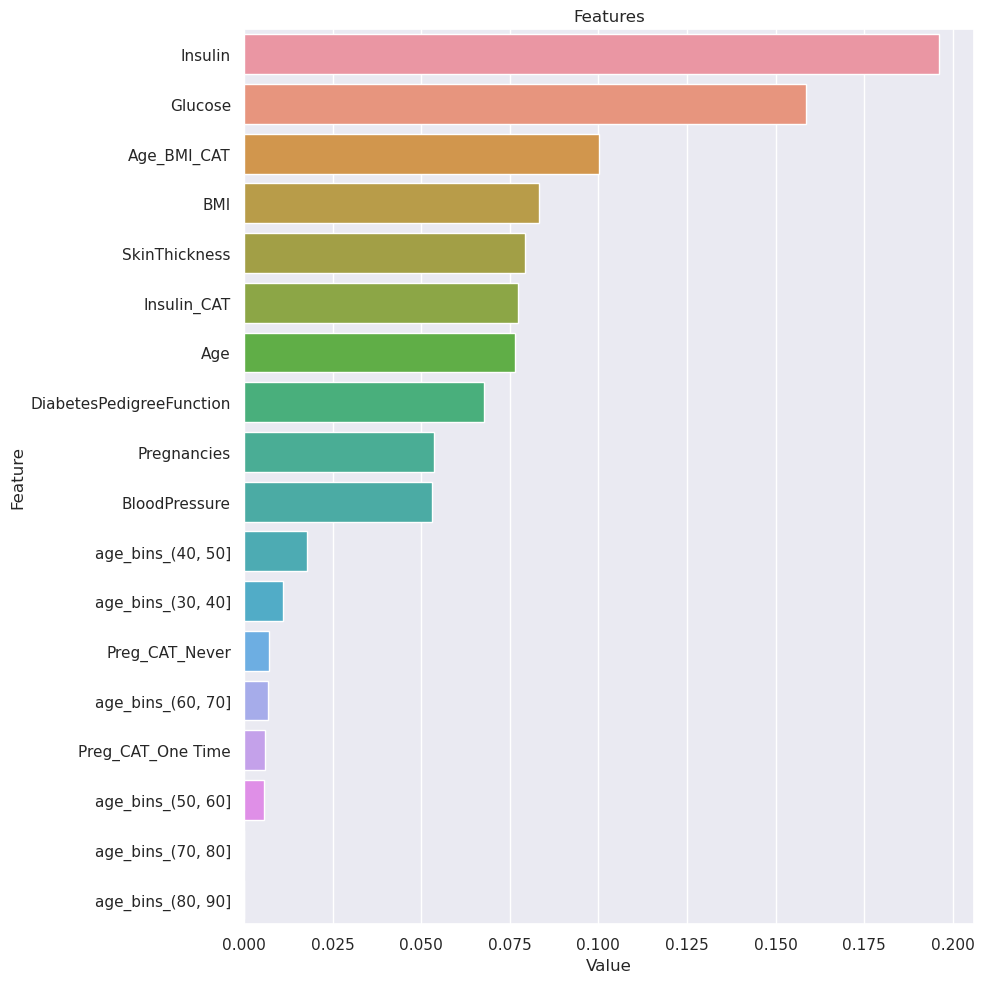

In [36]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(rf_model, X_train)

In [37]:
#Logistic regression
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)



log_model = LogisticRegression().fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        97
           1       0.83      0.67      0.74        57

    accuracy                           0.82       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



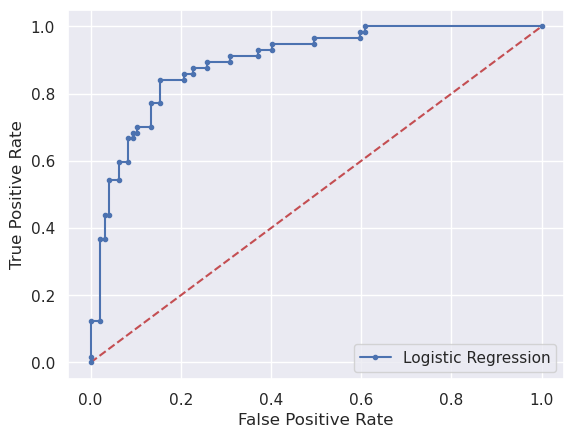

In [39]:
# I want see ROC-curve of Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_score(y_test,y_prob)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [40]:
#Cross Validation
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.7969442322383499
test_f1:  0.6941606443877514
test_roc_auc:  0.8723312368972745


In [41]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.get_params()
#'n_neighbors': 5

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
knn_params = {"n_neighbors": range(2, 50)}
knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

knn_gs_best.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 49}

In [43]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.6874883286647993
test_f1:  0.5274186688350964
test_roc_auc:  0.725329140461216


## **Conclusion**

 I have tried 3 different models (RandomForestClassifier, Logistic Regression, KNN). I did for all of them 5-Fold Cross Validation.

Out of the three we find Random Forest performing the best with accuracy of 83.33%

Top 5 variables for our prediction, we get to know are Insulin, Glucose, Age_BMI_CAT, BMI, SkinThickness